# Clustering

## K-means

Going to generate 5 clusters of points on a 2-D graph, implement k-means, and then try to find a metric to find the best k.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import random
import numpy as np

random.seed(42196)
np.random.seed(42196)

# 5 clusters, manually selected centers
cluster_centers = [
    (4,6),
    (33,-28),
    (-19,-21),
    (40,30),
    (-26,37),
]

data = []
for i in range(5):
    std_dev = random.random() * 5. + 5.
    print (f"Cluster {i}: ({cluster_centers[i][0]}, {cluster_centers[i][1]}), std dev {std_dev:.2f}")
    
    # between 10 to 25 samples per cluster
    cluster = np.random.normal(0, std_dev, (random.randint(10,25),2))
    cluster[:,0] += cluster_centers[i][0]
    cluster[:,1] += cluster_centers[i][1]
    data.append(cluster)
    
all_data = data[0]
for i in range(1,len(data)):
    all_data = np.vstack((all_data, data[i]))

Cluster 0: (4, 6), std dev 6.14
Cluster 1: (33, -28), std dev 5.05
Cluster 2: (-19, -21), std dev 9.15
Cluster 3: (40, 30), std dev 8.45
Cluster 4: (-26, 37), std dev 7.68


Print a true graph of the clusters.

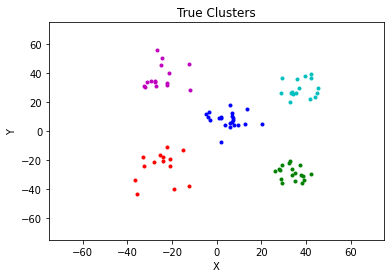

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt_colors = "bgrcmykw"
plt_marks = "ov^<>s*x" # this is not all markers, just enough for me to work with

#plt.figure(figsize=(10,7)) # 10 is width, 7 is height
for i in range(len(data)):
    plt.plot(data[i][:,0], data[i][:,1], f"{plt_colors[i]}.")
plt.title('True Clusters')  
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.show()

Print all points.

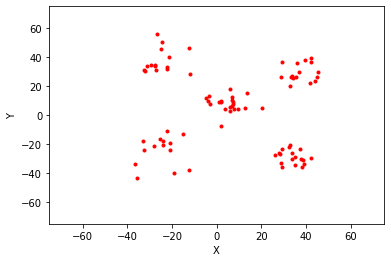

In [52]:
plt.plot(all_data[:,0], all_data[:,1], f"r.")
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.show()

My k-means implementation. Just start with knowing there are 5 clusters.

In [84]:
#np.random.seed(42196)
# example of not converging if you use the seed above
means = np.random.random((5,2)) * 150. - 75.

assignments_prev = None
assignments = np.zeros((all_data.shape[0]), dtype=int)

# iterate until no changes
counter = 0
while assignments_prev is None or np.sum(assignments - assignments_prev) != 0:
    counter += 1
    assignments_prev = np.copy(assignments)
    
    # compute assignments
    for p, point in enumerate(all_data):
        closest = None
        close_val = None
        for i in range(len(means)):
            distance = ((point[0] - means[i][0]) ** 2 + (point[1] - means[i][1]) ** 2) ** 0.5
            if close_val is None:
                close_val = distance
                closest = i
            elif distance < close_val:
                close_val = distance
                closest = i
        assignments[p] = closest
        
    # recompute means
    counts = np.zeros((5), dtype=float)
    sums = np.zeros((5,2), dtype=float)
    for i in range(assignments.shape[0]):
        sums[assignments[i]] += all_data[i]
        counts[assignments[i]] += 1.
    for i in range(5):
        if counts[i] != 0.:
            means[i] = sums[i] / counts[i]
            
print (f"Ran {counter} iterations.")
print (assignments)
print (means)

Ran 11 iterations.
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4]
[[ 33.76827052 -28.83276784]
 [-24.94186077 -24.26031858]
 [  5.10814565   7.88686827]
 [ 37.58165183  29.37187988]
 [-24.90677475  37.4340443 ]]


Graph my results.

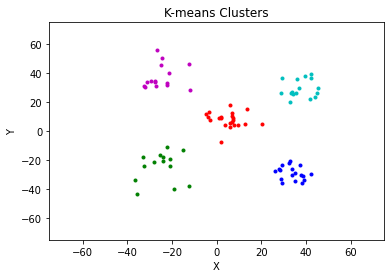

In [85]:
for i in range(5):
    x = []
    y = []
    for p in range(assignments.shape[0]):
        if assignments[p] == i:
            x.append(all_data[p][0])
            y.append(all_data[p][1])
    plt.plot(x, y, f"{plt_colors[i]}.")

plt.title('K-means Clusters')  
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.show()

## Expectation Maximization

Recreating the example in this [YouTube lecture](https://youtu.be/iQoXFmbXRJA). Two 1-D clusters, we don't know which points belong to which cluster. Estimate the mean and variance.

In [44]:
np.random.seed(42196)
# manually set
means = np.random.random(2) * 10.
variances = np.random.random(2) * 4. + 4.

print (f"Cluster 1, mu={means[0]:.2f}, sigma={variances[0]**0.5:.2f}")
print (f"Cluster 2, mu={means[1]:.2f}, sigma={variances[1]**0.5:.2f}")

Cluster 1, mu=6.66, sigma=2.58
Cluster 2, mu=3.28, sigma=2.01


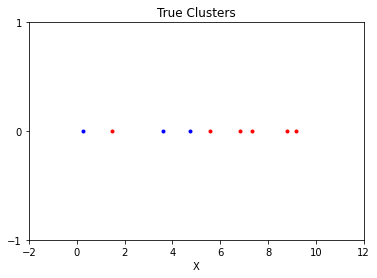

In [45]:
np.random.seed(42196)

# generate data
cluster_1 = np.random.normal(means[0], variances[0]**0.5, (np.random.randint(3,7)))
cluster_2 = np.random.normal(means[1], variances[1]**0.5, (np.random.randint(3,7)))

# plot
plt.plot(cluster_1, np.zeros(cluster_1.shape), "r.")
plt.plot(cluster_2, np.zeros(cluster_2.shape), "b.")
plt.title('True Clusters')  
plt.xlabel('X')
plt.xlim(-2, 12)
plt.ylim(-1, 1)
plt.yticks((-1,0,1))
plt.show()

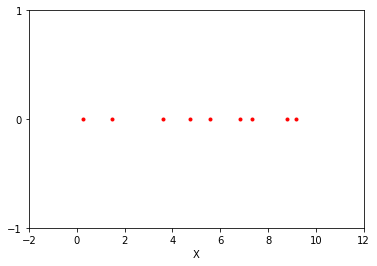

In [46]:
all_data = np.hstack((cluster_1, cluster_2))
# plot
plt.plot(all_data, np.zeros(all_data.shape), "r.")
plt.xlabel('X')
plt.xlim(-2, 12)
plt.ylim(-1, 1)
plt.yticks((-1,0,1))
plt.show()

Run algorithm.

In [53]:
np.random.seed(42196)
means = np.random.random(2)
variances = np.array((1.,1.))
priors = np.array((0.5,0.5))

assignments_prev = None
assignments = np.zeros((all_data.shape[0]), dtype=int)

# iterate until no changes
counter = 0
# a better way to decide exit condition probably exists:
# change in probs is under a certain average amount
# no change in assignment for multiple iters
#while assignments_prev is None or np.sum(assignments - assignments_prev) != 0:
while counter < 100:
    counter += 1
    assignments_prev = np.copy(assignments)
    
    # compute assignments
    probs = np.zeros((all_data.shape[0], means.shape[0]))
    # trying to vectorize, probably would have been more worthwhile to just do it using loops first
    # first find P(x_i | cluster)
    probs = (2 * np.pi * np.tile(variances, (all_data.shape[0],1))) ** -0.5
    probs *= np.exp(-1 * ((np.tile(all_data, (2,1)).T - means.reshape(1,-1)) ** 2) / (2 * variances.reshape(1,-1)))
    # now find P(cluster | x_i) using Bayes
    probs *= priors.reshape(1,-1)
    probs /= np.sum(probs, axis=1).reshape(-1,1)
    
    # now compute means
    means = np.sum(probs * np.tile(all_data, (2,1)).T, axis=0) / np.sum(probs, axis=0)
    # now compute variances
    variances = np.sum(probs * ((np.tile(all_data, (2,1)).T) - means.reshape(1,-1)) ** 2, axis=0) / np.sum(probs, axis=0)
    # now recompute priors
    priors = np.sum(probs, axis=0) / all_data.shape[0]
    
    for i in range(all_data.shape[0]):
        assignments[i] = np.argmax(probs[i])
        
print (f"Ran {counter} iterations")
print (probs)
print (assignments)
print (f"Cluster 1, mu={means[0]:.2f}, sigma={variances[0]**0.5:.2f}")
print (f"Cluster 2, mu={means[1]:.2f}, sigma={variances[1]**0.5:.2f}")

Ran 100 iterations
[[1.00000000e+00 8.11867860e-14]
 [1.00000000e+00 7.93538097e-22]
 [6.86783787e-02 9.31321621e-01]
 [1.00000000e+00 7.03666419e-41]
 [1.00000000e+00 2.21899411e-37]
 [1.00000000e+00 2.29143950e-25]
 [9.99999998e-01 1.93967045e-09]
 [1.17272033e-02 9.88272797e-01]
 [9.99919458e-01 8.05416934e-05]]
[0 0 1 0 0 0 0 1 0]
Cluster 1, mu=6.51, sigma=1.97
Cluster 2, mu=0.84, sigma=0.61


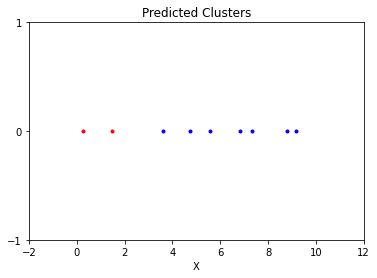

In [54]:
c1 = []
c2 = []
for p in range(all_data.shape[0]):
    if assignments[p] == c:
        c1.append(all_data[p])
    else:
        c2.append(all_data[p])
plt.plot(c1, np.zeros(len(c1)), "r.")
plt.plot(c2, np.zeros(len(c2)), "b.")
plt.title('Predicted Clusters')  
plt.xlabel('X')
plt.xlim(-2, 12)
plt.ylim(-1, 1)
plt.yticks((-1,0,1))
plt.show()

## Gaussian Mixture Models

Example: Average adult male weight in US, Canada, and Mexico. Create a Gaussian Mixture Model of the average adult male weight in North America.

In [8]:
# rows: Canada, US, Mexico
# cols: weight mean, weight std dev, population (assuming adult male population is proportional to total population)
# weight in pounds
# I made up std dev data
# population in millions
vals = np.array(
    [[187.0, 15.0, 38.25],
    [199.7, 12.0, 331.9],
    [165.0, 11.0, 130.3],]
)

In [10]:
# compute mixture components
vals[:,-1] /= np.sum(vals[:,-1])

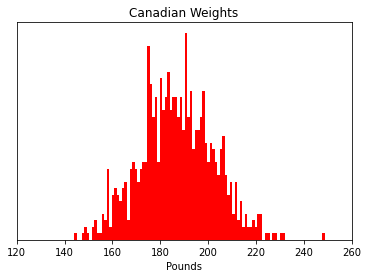

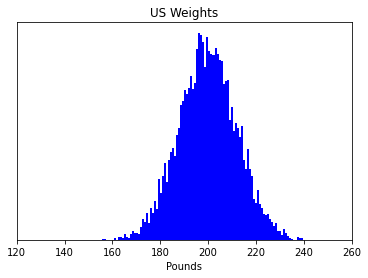

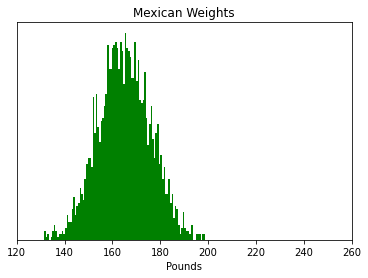

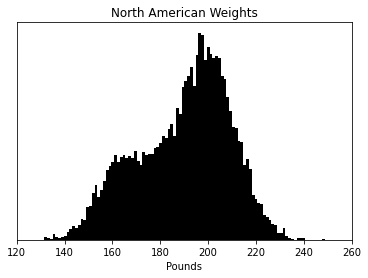

In [24]:
np.random.seed(42196)

data = [[],[],[]]
# histogram, 10,000 samples
for _ in range(10000):
    country = np.random.random()
    if country < vals[0][-1]:
        country = 0
    elif country > 1-vals[-1][-1]:
        country = 2
    else:
        country = 1    
    data[country].append(np.random.normal(vals[country][0], vals[country][1]))

# canada
plt.hist(data[0], bins=100, facecolor="r")
plt.title('Canadian Weights')  
plt.xlabel('Pounds')
plt.xlim(120,260)
plt.yticks(())
plt.show()

# us 
plt.hist(data[1], bins=100, facecolor="b")
plt.title('US Weights')  
plt.xlabel('Pounds')
plt.xlim(120,260)
plt.yticks(())
plt.show()

# mexico
plt.hist(data[2], bins=100, facecolor="g")
plt.title('Mexican Weights')  
plt.xlabel('Pounds')
plt.xlim(120,260)
plt.yticks(())
plt.show()

# north america
plt.hist(data[0]+data[1]+data[2], bins=100, facecolor="k")
plt.title('North American Weights')  
plt.xlabel('Pounds')
plt.xlim(120,260)
plt.yticks(())
plt.show()

Percentile for given weights in each distribution.

In [27]:
from scipy.stats import norm

for weight in range(100, 361, 10):
    can = norm.cdf((weight - vals[0][0]) / vals[0][1]) * 100.
    us = norm.cdf((weight - vals[1][0]) / vals[1][1]) * 100.
    mex = norm.cdf((weight - vals[2][0]) / vals[2][1]) * 100.
    na = vals[0][-1] * can + vals[1][-1] * us + vals[2][-1] * mex
    
    print (f"Weight: {weight} pounds, Canada: {can:.2f}%, US: {us:.2f}%, Mexico: {mex:.2f}%, North America: {na:.2f}%")

Weight: 100 pounds, Canada: 0.00%, US: 0.00%, Mexico: 0.00%, North America: 0.00%
Weight: 110 pounds, Canada: 0.00%, US: 0.00%, Mexico: 0.00%, North America: 0.00%
Weight: 120 pounds, Canada: 0.00%, US: 0.00%, Mexico: 0.00%, North America: 0.00%
Weight: 130 pounds, Canada: 0.01%, US: 0.00%, Mexico: 0.07%, North America: 0.02%
Weight: 140 pounds, Canada: 0.09%, US: 0.00%, Mexico: 1.15%, North America: 0.31%
Weight: 150 pounds, Canada: 0.68%, US: 0.00%, Mexico: 8.63%, North America: 2.30%
Weight: 160 pounds, Canada: 3.59%, US: 0.05%, Mexico: 32.47%, North America: 8.76%
Weight: 170 pounds, Canada: 12.85%, US: 0.67%, Mexico: 67.53%, North America: 19.01%
Weight: 180 pounds, Canada: 32.04%, US: 5.03%, Mexico: 91.37%, North America: 29.58%
Weight: 190 pounds, Canada: 57.93%, US: 20.94%, Mexico: 98.85%, North America: 44.05%
Weight: 200 pounds, Canada: 80.69%, US: 51.00%, Mexico: 99.93%, North America: 66.01%
Weight: 210 pounds, Canada: 93.74%, US: 80.46%, Mexico: 100.00%, North America: 86.

Makes me think that the US probably has a much greater standard deviation.